In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint as pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 618


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
  
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:

        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | fort mcmurray
Processing Record 6 of Set 1 | bredasdorp
Processing Record 7 of Set 1 | puerto armuelles
Processing Record 8 of Set 1 | east grand forks
Processing Record 9 of Set 1 | olonkinbyen
Processing Record 10 of Set 1 | grand island
Processing Record 11 of Set 1 | saudarkrokur
Processing Record 12 of Set 1 | adamstown
Processing Record 13 of Set 1 | papatowai
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | belem de sao francisco
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | barcelos
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | fo

Processing Record 39 of Set 4 | severo-yeniseyskiy
Processing Record 40 of Set 4 | tacna
Processing Record 41 of Set 4 | kutum
Processing Record 42 of Set 4 | daru
Processing Record 43 of Set 4 | bikenibeu village
Processing Record 44 of Set 4 | muynoq
Processing Record 45 of Set 4 | emerald
Processing Record 46 of Set 4 | ca mau
Processing Record 47 of Set 4 | tual
Processing Record 48 of Set 4 | udachny
Processing Record 49 of Set 4 | ixtapa
Processing Record 0 of Set 5 | tarauaca
Processing Record 1 of Set 5 | palma del rio
Processing Record 2 of Set 5 | chiili
City not found. Skipping...
Processing Record 3 of Set 5 | harper
Processing Record 4 of Set 5 | manokwari
Processing Record 5 of Set 5 | walvis bay
Processing Record 6 of Set 5 | 'izbat al burj
City not found. Skipping...
Processing Record 7 of Set 5 | gao
Processing Record 8 of Set 5 | northam
Processing Record 9 of Set 5 | leava
Processing Record 10 of Set 5 | enewetak
Processing Record 11 of Set 5 | jamestown
Processing R

Processing Record 36 of Set 8 | i-n-salah
Processing Record 37 of Set 8 | berriane
Processing Record 38 of Set 8 | berlin
Processing Record 39 of Set 8 | torit
Processing Record 40 of Set 8 | feres
Processing Record 41 of Set 8 | kokoda
Processing Record 42 of Set 8 | galle
Processing Record 43 of Set 8 | tremonton
Processing Record 44 of Set 8 | sao joao da barra
Processing Record 45 of Set 8 | miramar beach
Processing Record 46 of Set 8 | nichinan
Processing Record 47 of Set 8 | ha'il
Processing Record 48 of Set 8 | keban
Processing Record 49 of Set 8 | tibanbang
Processing Record 0 of Set 9 | zouerate
Processing Record 1 of Set 9 | yelizovo
Processing Record 2 of Set 9 | ulsteinvik
Processing Record 3 of Set 9 | eenhana
Processing Record 4 of Set 9 | kyain seikgyi township
City not found. Skipping...
Processing Record 5 of Set 9 | tuy hoa
Processing Record 6 of Set 9 | nurota
Processing Record 7 of Set 9 | peniche
Processing Record 8 of Set 9 | novodvinsk
Processing Record 9 of Set 

Processing Record 26 of Set 12 | krasnoarmeysk
Processing Record 27 of Set 12 | altagracia de orituco
Processing Record 28 of Set 12 | myitkyina
Processing Record 29 of Set 12 | minot air force base
Processing Record 30 of Set 12 | weno
Processing Record 31 of Set 12 | suarez
Processing Record 32 of Set 12 | etikoppaka
City not found. Skipping...
Processing Record 33 of Set 12 | zharkent
Processing Record 34 of Set 12 | la'ie
Processing Record 35 of Set 12 | maues
Processing Record 36 of Set 12 | robore
Processing Record 37 of Set 12 | verkhov'ye
Processing Record 38 of Set 12 | archangelos
Processing Record 39 of Set 12 | kampene
Processing Record 40 of Set 12 | greer
Processing Record 41 of Set 12 | timbuktu
Processing Record 42 of Set 12 | clarion
Processing Record 43 of Set 12 | sahavato
City not found. Skipping...
Processing Record 44 of Set 12 | alice springs
Processing Record 45 of Set 12 | zakynthos
Processing Record 46 of Set 12 | siwa oasis
Processing Record 47 of Set 12 | fi

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          594
Lat           594
Lng           594
Max Temp      594
Humidity      594
Cloudiness    594
Wind Speed    594
Country       594
Date          594
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,77,3,0.89,NZ,1691637416
1,port-aux-francais,-49.3500,70.2167,3.52,87,97,10.29,TF,1691637344
2,grytviken,-54.2811,-36.5092,-5.04,93,94,1.92,GS,1691637170
3,iqaluit,63.7506,-68.5145,5.85,100,100,4.47,CA,1691637427
4,fort mcmurray,56.7268,-111.3810,12.86,95,100,2.30,CA,1691637129


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,77,3,0.89,NZ,1691637416
1,port-aux-francais,-49.3500,70.2167,3.52,87,97,10.29,TF,1691637344
2,grytviken,-54.2811,-36.5092,-5.04,93,94,1.92,GS,1691637170
3,iqaluit,63.7506,-68.5145,5.85,100,100,4.47,CA,1691637427
4,fort mcmurray,56.7268,-111.3810,12.86,95,100,2.30,CA,1691637129


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

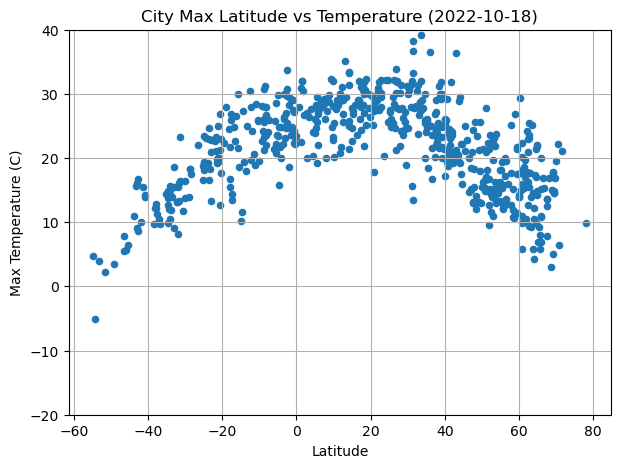

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind='scatter', x='Lat', y='Max Temp', grid=True, figsize=(7,5), title="City Max Latitude vs Temperature (2022-10-18)")

# Incorporate the other graph properties
plt.ylim(-20,40)
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

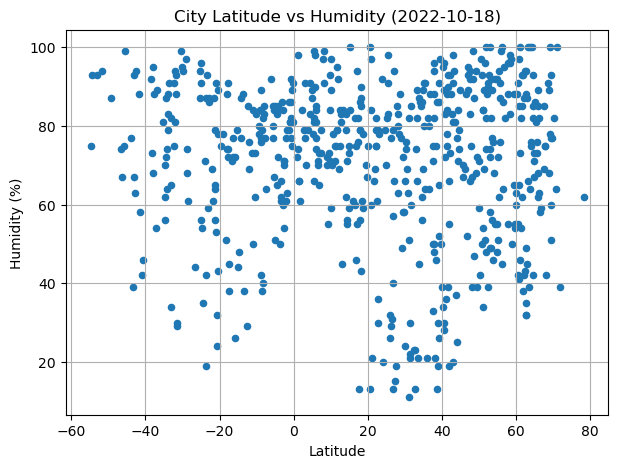

In [9]:
# Build scatter plot for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', grid=True, figsize=(7,5), title="City Latitude vs Humidity (2022-10-18)")

# Incorporate the other graph properties
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

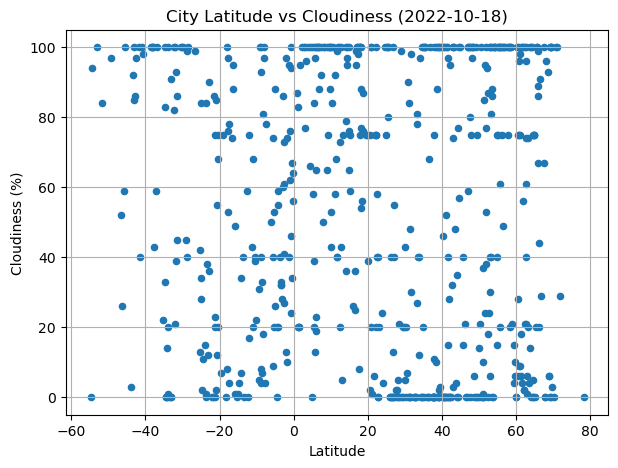

In [10]:
# Build scatter plot for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', grid=True, figsize=(7,5), title="City Latitude vs Cloudiness (2022-10-18)", )

# Incorporate the other graph properties
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

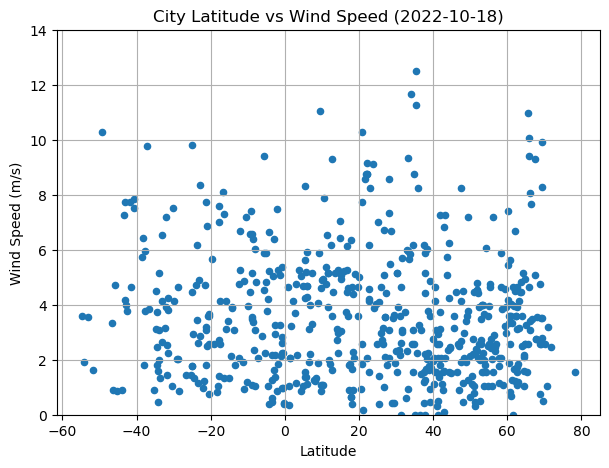

In [11]:
# Build scatter plot for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', grid=True, figsize=(7,5), title="City Latitude vs Wind Speed (2022-10-18)", )

# Incorporate the other graph properties
plt.ylim(0,14)
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,iqaluit,63.7506,-68.5145,5.85,100,100,4.47,CA,1691637427
4,fort mcmurray,56.7268,-111.3810,12.86,95,100,2.30,CA,1691637129
6,puerto armuelles,8.2833,-82.8667,27.27,91,100,1.34,PA,1691637502
7,east grand forks,47.9300,-97.0245,18.34,75,75,0.45,US,1691637231
8,olonkinbyen,70.9221,-8.7187,6.49,100,100,3.20,SJ,1691637178


In [13]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,77,3,0.89,NZ,1691637416
1,port-aux-francais,-49.3500,70.2167,3.52,87,97,10.29,TF,1691637344
2,grytviken,-54.2811,-36.5092,-5.04,93,94,1.92,GS,1691637170
5,bredasdorp,-34.5322,20.0403,9.81,87,0,1.81,ZA,1691637269
11,adamstown,-25.0660,-130.1015,19.33,56,84,9.81,PN,1691637341


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7091388896202566


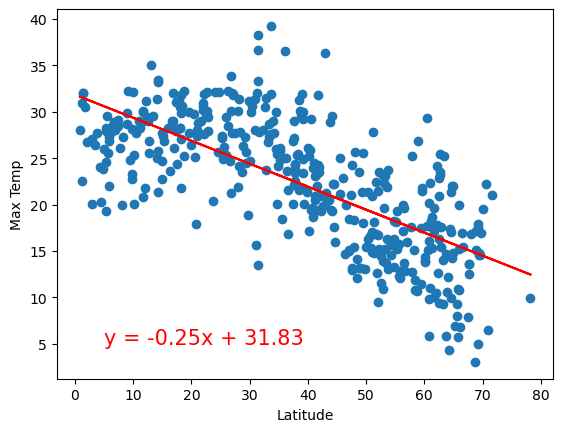

In [14]:
# Linear regression on Northern Hemisphere
 # Plot the different factors in a scatter plot
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,5),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.8220336772726513


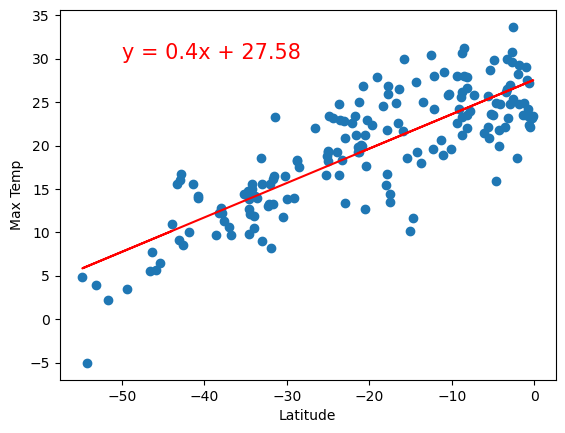

In [15]:
# Linear regression on Southern Hemisphere
 # Plot the different factors in a scatter plot
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For the Northern Hemisphere relationship between Max Temp and Latitude, this graph is showing a negative correlation, as indicated by the negative r-value and the regression line. What this means is that as Latitude increases, the Max Temp decreases. The opposite occurs for the Southern Hemisphere plot, showing a positive correlation that as Latitude increases, so does the Max Temperature. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: -0.011428132454324554


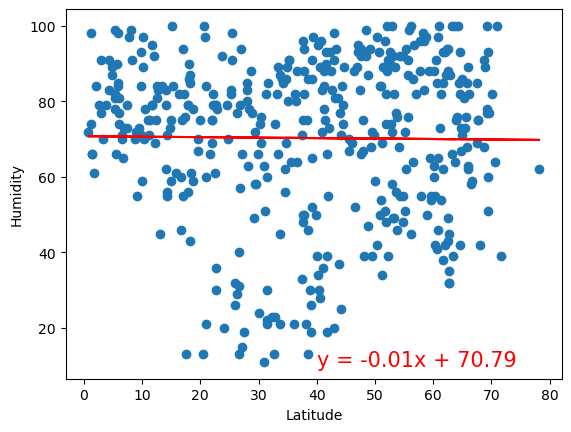

In [16]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.04729398481308255


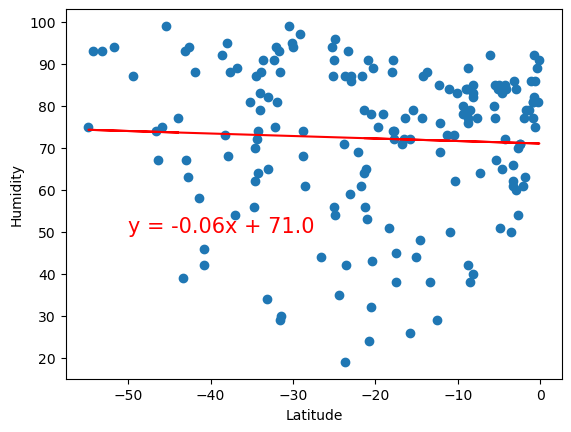

In [17]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For both Northern and Southern Hemisphere relationship between Humidity and Latitude, this graph is showing a slight negative correlation, as indicated by the negative r-value and the regression line. What this means is that as Latitude increases, the Humidity trends down. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.12180739740165203


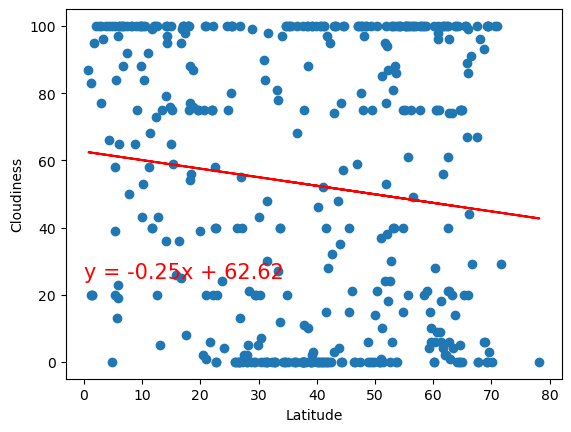

In [18]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.19035249277774063


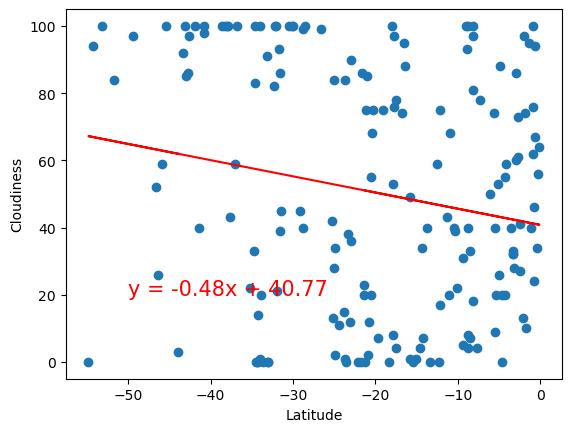

In [19]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** there does not seem to be any trends or clear relationship between latitude and cloudiness., as indicated by the negative r-value and the regression line.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.07669035196366757


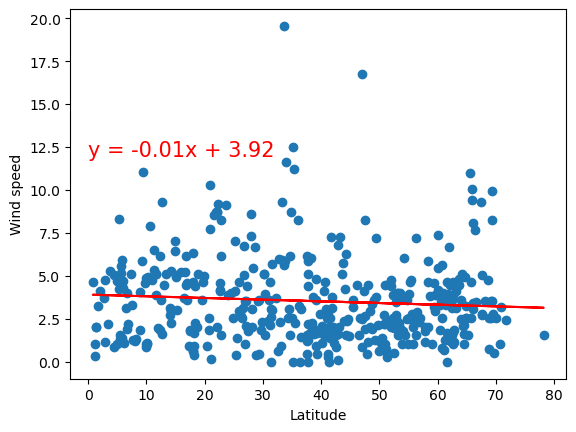

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.07669035196366757


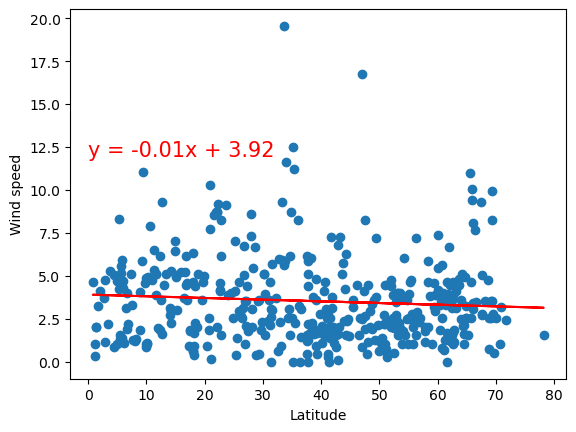

In [21]:
# Southern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** For both the Northern and Southern Hemisphere plots, the small r-value and regression line show that there is not a strong correlation between Wind Speed and Latitude. There is not a strong correlation between the rate of change for wind speed and latitude.